<a href="https://colab.research.google.com/github/nanabonsu92/Deep-Learning_TIES4911/blob/main/Bonsu_Afrane_Kwaku_Task_1_3(Extra).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1-3(Extra)**

Try to improve your Keras based solution (from previous task) to get better model and as result a better prediction… (Hint: you may play with network architecture and training hyper-parameters: learning rate, optimization algorithm, activation functions, number of epochs, batch sizes, etc.). Show the results and corresponding configurations in the table.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [ ]:
# Load the dataset
dataframe = pd.read_csv("/content/gdrive/MyDrive/Deep Learning 2024/HousingData.csv")

In [ ]:
# Seed for reproducibility
SEED_VALUE = 42
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [ ]:
# Preparing the data
X = dataframe.iloc[:, :-1]  # All rows, all columns except the last one
y = dataframe.iloc[:, -1]   # All rows, only the last column

In [ ]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Selecting a single feature 'RM'
x_train_id = x_train['RM']
x_test_id = x_test['RM']

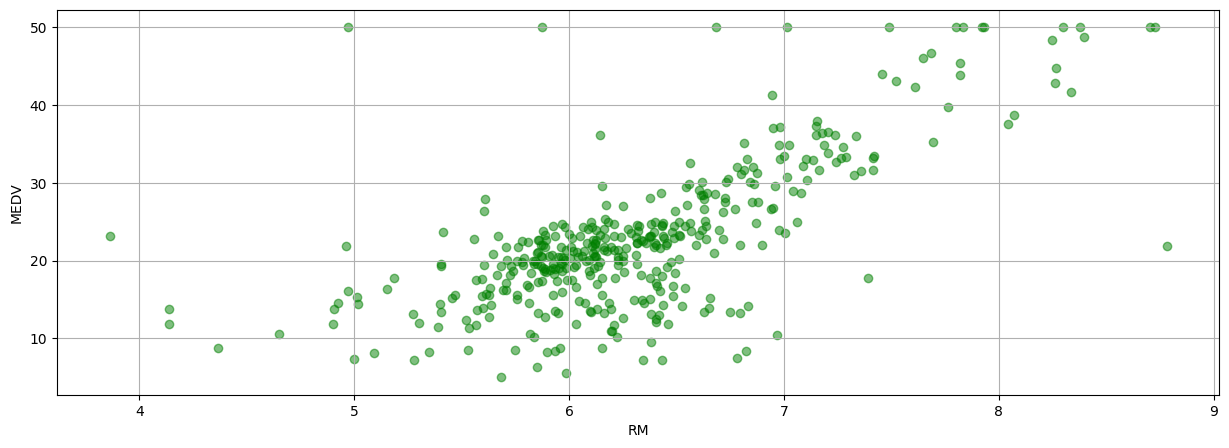

In [ ]:
# Plotting the data
plt.figure(figsize=(15, 5))
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.grid(True)
plt.scatter(x_train_id, y_train, color='green', alpha=0.5)
plt.show()

In [ ]:
# Defining the model
model = Sequential()
model.add(Dense(units=128, input_shape=(1,), activation='relu'))  # First hidden layer with 128 neurons
model.add(Dropout(0.2))  # Dropout layer
model.add(Dense(units=64, activation='relu'))  # Second hidden layer with 64 neurons
model.add(Dropout(0.2))  # Dropout layer
model.add(Dense(units=32, activation='relu'))  # Third hidden layer with 32 neurons
model.add(Dense(units=1))  # Output layer

In [ ]:
# Compiling the model to include MAE as a metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [ ]:
# Displaying a summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               256       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625

In [ ]:
# Training the model
history = model.fit(x_train_id, y_train, batch_size=32, epochs=200, validation_split=0.3)

Epoch 1/200
9/9 [==============================] - 1s 29ms/step - loss: 527.6643 - mae: 20.8900 - val_loss: 421.1281 - val_mae: 18.9163
Epoch 2/200
9/9 [==============================] - 0s 9ms/step - loss: 403.7293 - mae: 17.7243 - val_loss: 285.5539 - val_mae: 15.0359
Epoch 3/200
9/9 [==============================] - 0s 9ms/step - loss: 252.6792 - mae: 13.2414 - val_loss: 141.8159 - val_mae: 9.7806
Epoch 4/200
9/9 [==============================] - 0s 8ms/step - loss: 121.5372 - mae: 8.1097 - val_loss: 52.6475 - val_mae: 4.9795
Epoch 5/200
9/9 [==============================] - 0s 8ms/step - loss: 81.1999 - mae: 7.0692 - val_loss: 57.4660 - val_mae: 5.9816
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 84.9666 - mae: 7.4250 - val_loss: 52.7716 - val_mae: 5.5644
Epoch 7/200
9/9 [==============================] - 0s 8ms/step - loss: 74.4307 - mae: 6.6348 - val_loss: 48.2237 - val_mae: 4.8266
Epoch 8/200
9/9 [==============================] - 0s 9ms/step - loss:

In [ ]:
# Evaluate the model on the test data
loss, mae = model.evaluate(x_test_id, y_test, verbose=0)

# Print loss and MAE
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

Test Loss: 40.15966796875
Test MAE: 4.460320472717285


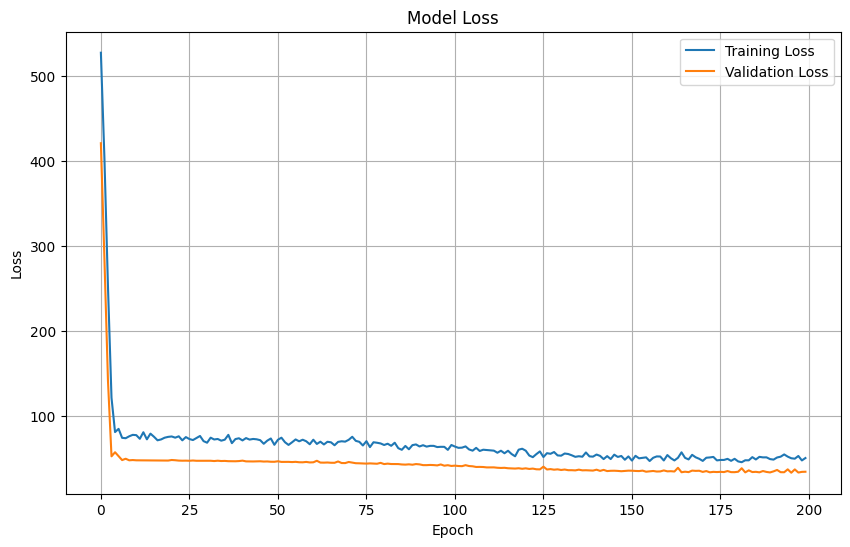

In [ ]:
# Plotting Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Predicting the median price of a home with [3, 4, 5, 6, 7] rooms.
x = [3, 4, 5, 6, 7]
y_pred = model.predict(x)
for idx in range (len(x)):
  print("Predicted price of a home with {} rooms: ${}K".format(x[idx], int(y_pred[idx]*10)/10))

1/1 [==============================] - 0s 93ms/step
Predicted price of a home with 3 rooms: $3.1K
Predicted price of a home with 4 rooms: $7.2K
Predicted price of a home with 5 rooms: $12.2K
Predicted price of a home with 6 rooms: $18.2K
Predicted price of a home with 7 rooms: $28.2K


| Model | No. of layers | layer type | output shape | Parameters |optimizer|batch_size|epochs| Activation| Test Loss | Test MAE |
|-------|---------------|------------|--------------|------------|------|-------|-------|-------|------|-----|
|sequential| 1 |Dense|(None, 1)|2|tf.keras.optimizers.RMSprop|16|101||57.056888580322266|5.347475528717041|
|sequential| 3 |Dense, Dense, Dense|(None, 64), (None, 32), (None, 1)|128, 2080, 33|Adam|32|200|ReLu, ReLu|52.46604537963867|5.097309112548828|
|sequential|6|Dense, Dropout, Dense, Dropout, Dense, Dense|(None,128),(None,128),(None, 64),(None, 64),(None, 32),(None, 1)|256, 0, 8256, 0, 2080, 33|Adam|32|200|ReLu, ReLu, ReLu|40.15966796875|4.460320472717285|